In [1]:
#!pip install pytse_client

In [2]:
import pytse_client as tse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
#Download data from TSE Site
namad='اطلس'
data = tse.download(symbols=[namad],include_jdate= True,adjust = False) #adjust = True :قیمت تعدیل یافته سهم

In [4]:
df=data[namad]

In [5]:
#adding 26 empty row at end of dataframe
emptydf=pd.DataFrame(index=range(df.index.stop,df.index.stop+26))
df=df.append(emptydf)

C:\Users\h.alavi\AppData\Local\Temp\ipykernel_7732\722387715.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(emptydf)


In [6]:
df.tail(10)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate
1917,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
type(df),type(data)

(pandas.core.frame.DataFrame, dict)

In [8]:
df.describe()

,open,high,low,adjClose,value,volume,count,yesterday,close
count,1901.000000,1901.000000,1901.000000,1901.000000,1.901000e+03,1.901000e+03,1901.000000,1901.000000,1901.000000
mean,68779.610731,69783.238296,67723.902683,68768.591794,2.322350e+10,2.121667e+05,261.046291,68633.084692,68806.911625
std,87973.455361,89306.302922,86555.631936,87953.878925,5.525347e+10,7.323986e+05,506.148395,87844.448300,87975.940061
min,8385.000000,8500.000000,8360.000000,8395.000000,8.911000e+03,1.000000e+00,1.000000,8395.000000,8400.000000
25%,9882.000000,10000.000000,9760.000000,9849.000000,1.210373e+08,9.575000e+03,7.000000,9849.000000,9861.000000
50%,14710.000000,14725.000000,14685.000000,14709.000000,6.790448e+08,4.382800e+04,25.000000,14698.000000,14700.000000
75%,124001.000000,127999.000000,120000.000000,124686.000000,1.639399e+10,1.908180e+05,286.000000,124301.000000,125000.000000
max,285001.000000,288000.000000,279005.000000,281786.000000,6.886202e+11,2.016680e+07,4028.000000,281786.000000,281995.000000


In [9]:
#Tenkan-sen = (max-9-period high + min-9-period low) / 2
#, min_periods = 0
tenkan_max = df['high'].rolling(window = 9).max()
tenkan_min = df['low'].rolling(window = 9).min()
df['tenkan_sen'] = (tenkan_max + tenkan_min) / 2


In [10]:
#Kijun-sen = (max-26-period high + min-26-period low) / 2
kijun_max = df['high'].rolling(window = 26).max()
kijun_min = df['low'].rolling(window = 26).min()
df['kijun_sen'] = (kijun_max + kijun_min) / 2


In [11]:
#Senkou Span A = (Tenkan-sen + Kijun-sen) / 2
#(Kijun + Tenkan) / 2 Shifted ahead by 26 periods
df['senkou_a'] = ((df['kijun_sen'] + df['tenkan_sen']) / 2).shift(26)


In [12]:
#Senkou Span B = (max-52-period high + max-52-period low) / 2
#52 period High + Low / 2
senkou_b_max = df['high'].rolling(window = 52).max()
senkou_b_min = df['low'].rolling(window = 52).min()
df['senkou_b'] = ((senkou_b_max + senkou_b_min) / 2).shift(26)

In [13]:
df.tail(30)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate,tenkan_sen,kijun_sen,senkou_a,senkou_b
1897,2022-04-24,269035.0,272200.0,269035.0,270121.0,6.867739e+10,254247.0,637.0,271843.0,269999.0,1401-02-04,263001.0,252126.0,229450.50,230745.5
1898,2022-04-25,269000.0,272001.0,268601.0,270786.0,6.550823e+10,241919.0,628.0,270121.0,271555.0,1401-02-05,263001.0,252126.0,229450.50,230745.5
1899,2022-04-26,271005.0,272980.0,271005.0,272095.0,6.643996e+10,244179.0,713.0,270786.0,271600.0,1401-02-06,263001.0,252126.0,229450.50,230745.5
1900,2022-04-27,271010.0,272500.0,269002.0,270787.0,3.307260e+10,122135.0,785.0,272095.0,269950.0,1401-02-07,266025.5,252500.5,229700.50,230150.5
1901,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229777.75,230150.5
1902,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230625.25,229101.5
1903,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231003.25,228690.5
1904,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233416.25,228251.0
1905,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235316.25,228251.0
1906,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236566.25,229501.0


In [14]:
#Chikou Span = Close plotted 26 periods in the past
#Current close shifted -26
df['chikou'] = (df['close']).shift(-26)


In [15]:
df.tail(30)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate,tenkan_sen,kijun_sen,senkou_a,senkou_b,chikou
1897,2022-04-24,269035.0,272200.0,269035.0,270121.0,6.867739e+10,254247.0,637.0,271843.0,269999.0,1401-02-04,263001.0,252126.0,229450.50,230745.5,NaN
1898,2022-04-25,269000.0,272001.0,268601.0,270786.0,6.550823e+10,241919.0,628.0,270121.0,271555.0,1401-02-05,263001.0,252126.0,229450.50,230745.5,NaN
1899,2022-04-26,271005.0,272980.0,271005.0,272095.0,6.643996e+10,244179.0,713.0,270786.0,271600.0,1401-02-06,263001.0,252126.0,229450.50,230745.5,NaN
1900,2022-04-27,271010.0,272500.0,269002.0,270787.0,3.307260e+10,122135.0,785.0,272095.0,269950.0,1401-02-07,266025.5,252500.5,229700.50,230150.5,NaN
1901,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229777.75,230150.5,NaN
1902,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230625.25,229101.5,NaN
1903,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231003.25,228690.5,NaN
1904,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233416.25,228251.0,NaN
1905,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235316.25,228251.0,NaN
1906,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236566.25,229501.0,NaN


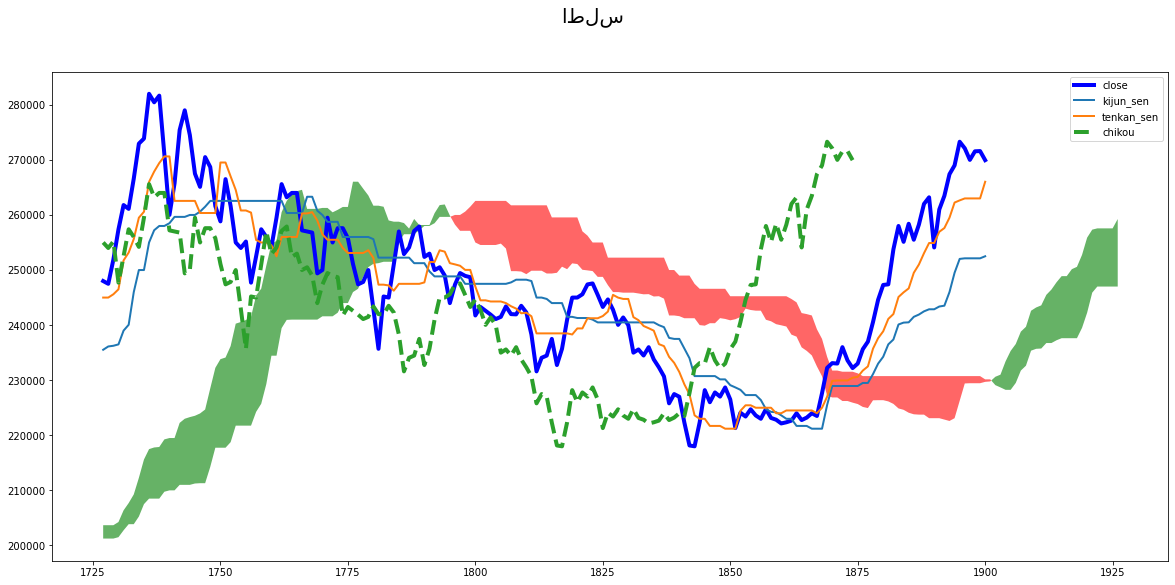

In [16]:
#Plotting Ichimoku
tmp = df[['close','kijun_sen','tenkan_sen','senkou_a','senkou_b','chikou']].tail(200)
fig,ax = plt.subplots(1,1,sharex=True,figsize = (20,9)) #share x axis and set a figure size
ax.plot(tmp['close'],label='close',linewidth=4,color='blue') # plot Close with index on x-axis with a line thickness of 4
ax.plot(tmp['kijun_sen'],label='kijun_sen',linewidth=2) # plot Close with index on x-axis with a line thickness of 4
ax.plot(tmp['tenkan_sen'],label='tenkan_sen',linewidth=2)
ax.plot(tmp['chikou'],label='chikou',linewidth=4,ls='--')
ax.fill_between(tmp.index, tmp.senkou_a, tmp.senkou_b,where=tmp['senkou_b']> tmp['senkou_a'], facecolor='red',interpolate=True,alpha=.60)
ax.fill_between(tmp.index, tmp.senkou_a, tmp.senkou_b,where=tmp['senkou_b']< tmp['senkou_a'], facecolor='green',interpolate=True,alpha=.60)
fig.suptitle(namad, fontsize=20)
ax.legend()

In [17]:
tmp

,close,kijun_sen,tenkan_sen,senkou_a,senkou_b,chikou
1727,248002.0,235525.5,245000.5,203675.25,201250.5,255000.0
1728,247500.0,236125.5,245000.5,203675.25,201250.5,254000.0
1729,251890.0,236251.0,245601.0,203675.25,201250.5,255175.0
1730,257390.0,236502.0,246500.5,204250.25,201500.5,247712.0
1731,261801.0,239001.5,251750.0,206370.25,202745.5,252500.0
...,...,...,...,...,...,...
1922,NaN,NaN,NaN,257563.50,247001.0,NaN
1923,NaN,NaN,NaN,257563.50,247001.0,NaN
1924,NaN,NaN,NaN,257563.50,247001.0,NaN
1925,NaN,NaN,NaN,257563.50,247001.0,NaN
